In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
df = pd.read_csv('DadoModelo.csv')

In [3]:
count_vectorizer = CountVectorizer(ngram_range=(1,2))    # Unigram and Bigram
final_vectorized_data = count_vectorizer.fit_transform(df['texto_processado'])  
final_vectorized_data

<3928x39146 sparse matrix of type '<class 'numpy.int64'>'
	with 115063 stored elements in Compressed Sparse Row format>

In [4]:
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, df['sentimento'],
                                                    test_size=0.2, random_state=69)  

In [5]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (3142, 39146)
X_test_shape :  (786, 39146)
y_train_shape :  (3142,)
y_test_shape :  (786,)


In [6]:
model_naive = MultinomialNB().fit(X_train, y_train)
predicted_naive = model_naive.predict(X_test)b b

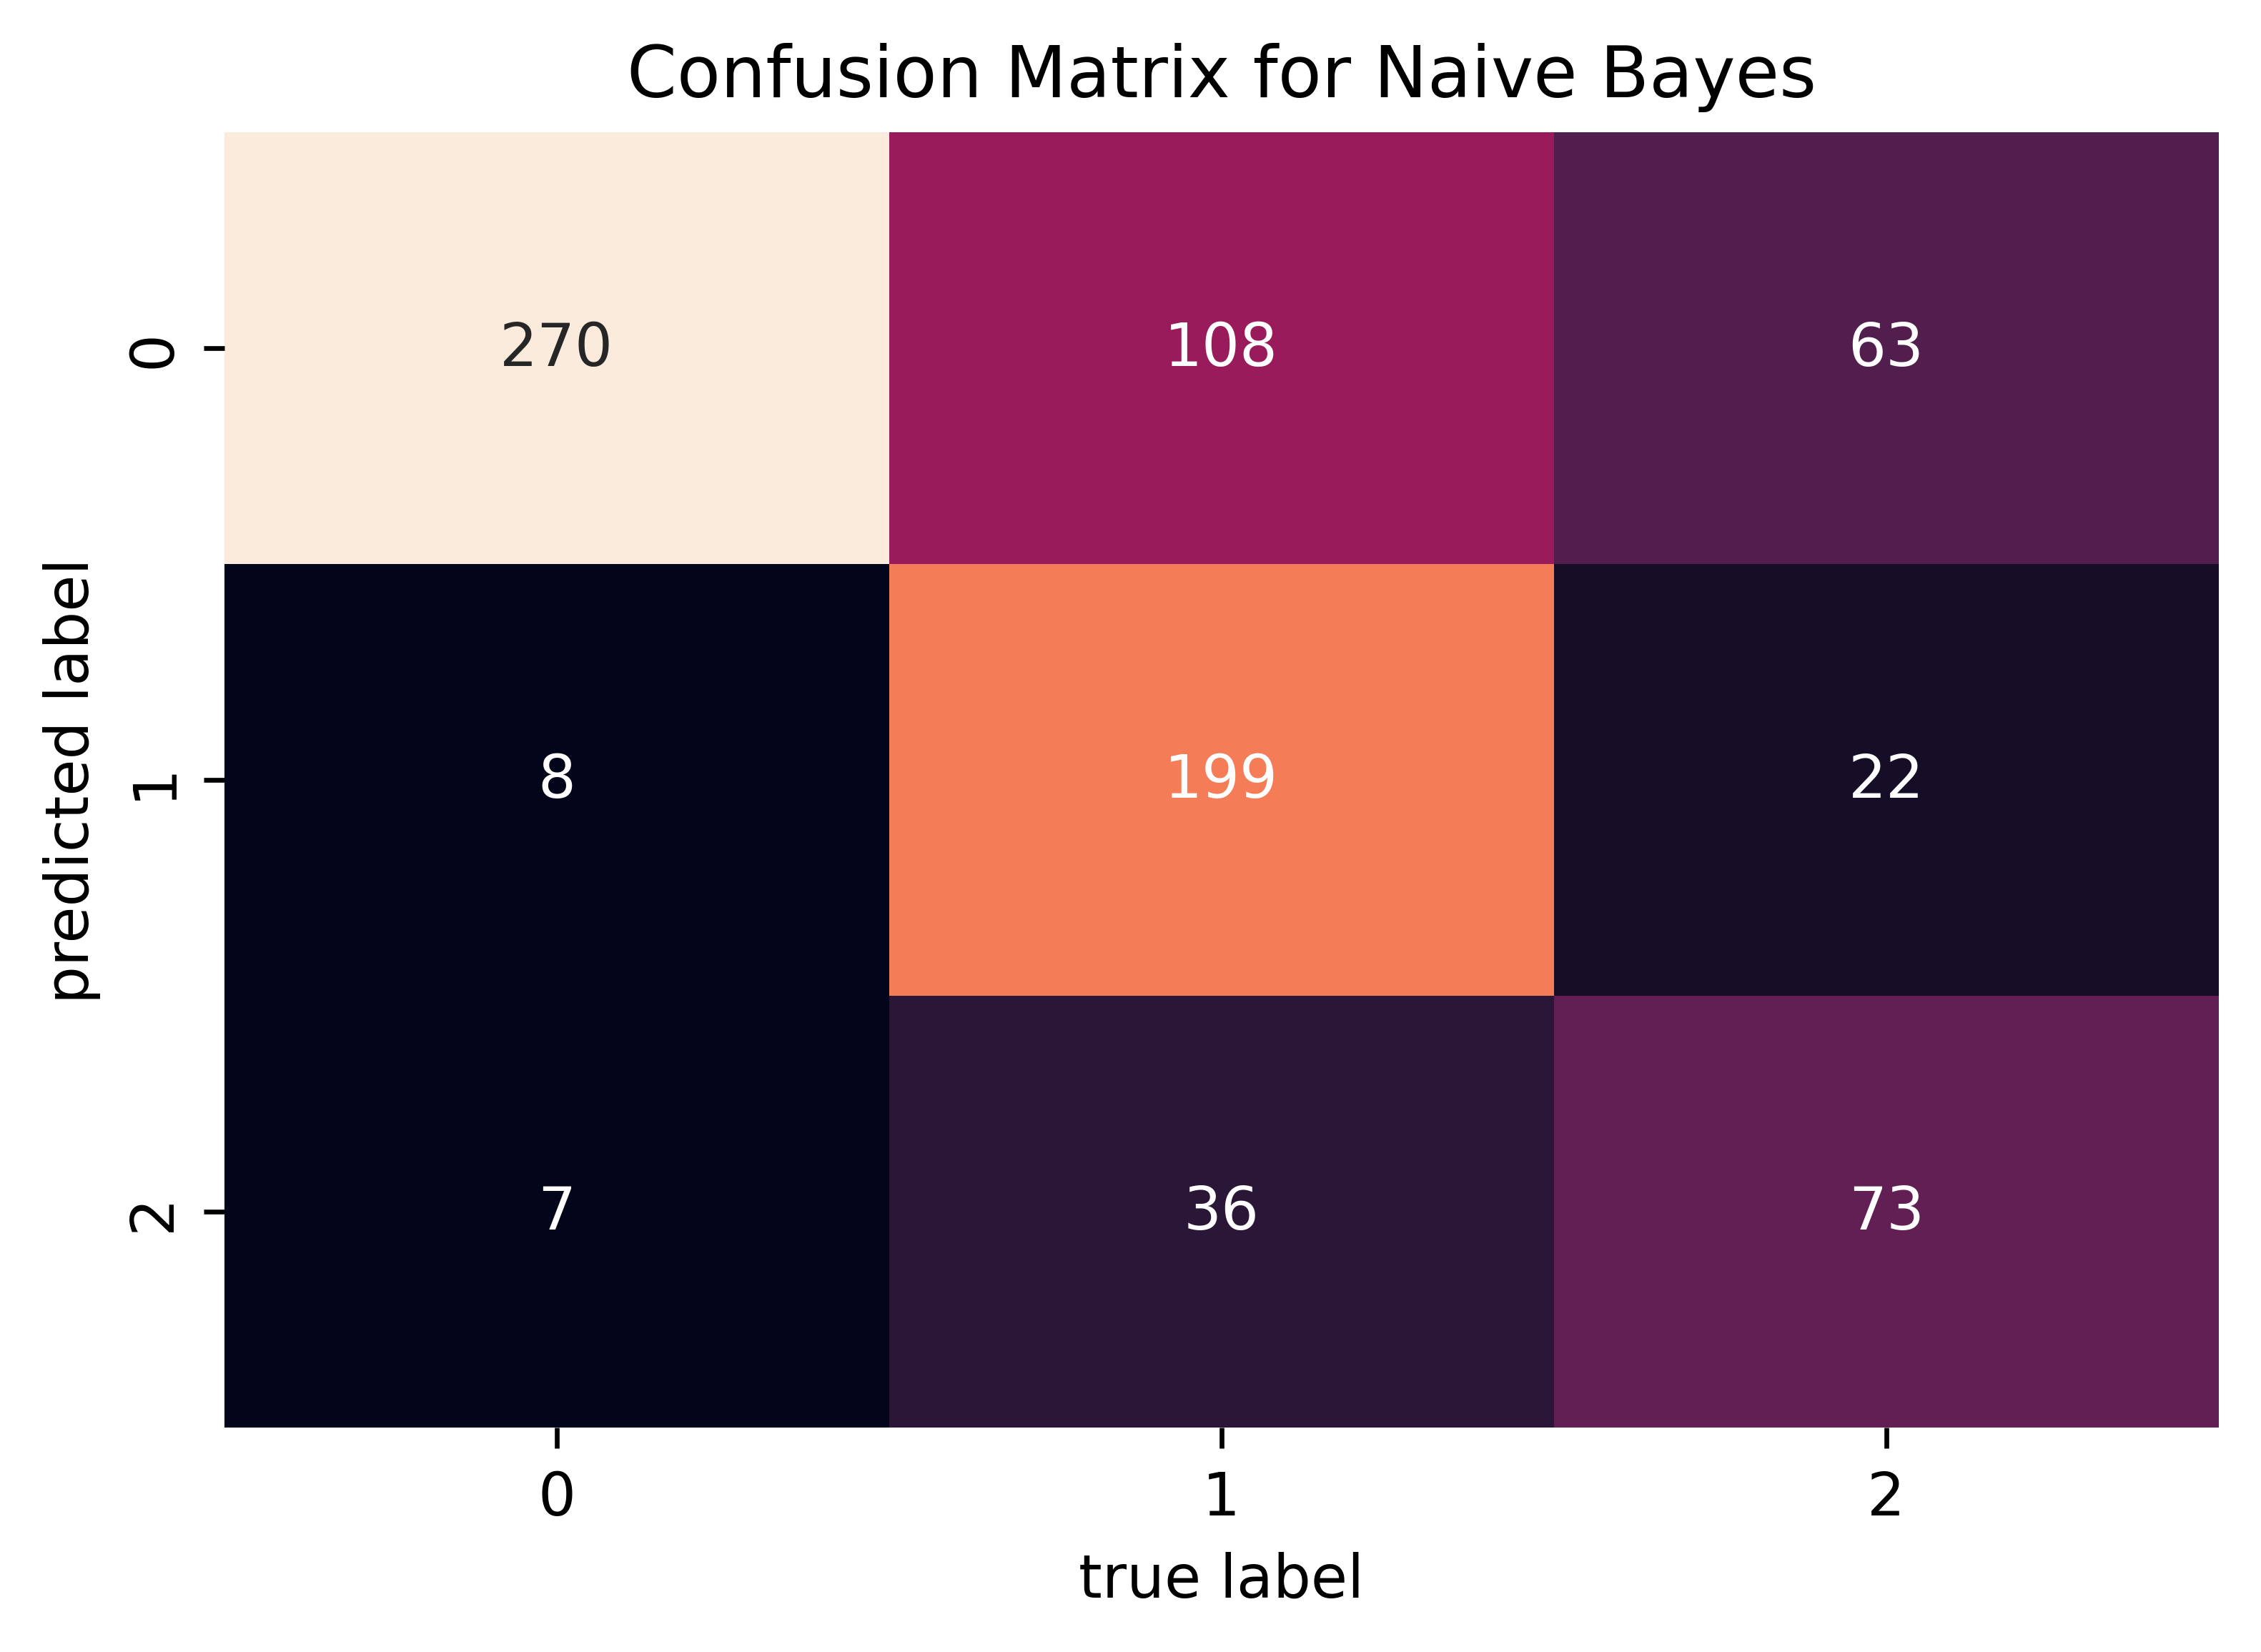

In [7]:
plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [8]:
score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.6895674300254453


In [9]:
print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

    Negativo       0.61      0.95      0.74       285
      Neutro       0.87      0.58      0.70       343
    Positivo       0.63      0.46      0.53       158

    accuracy                           0.69       786
   macro avg       0.70      0.66      0.66       786
weighted avg       0.73      0.69      0.68       786



In [10]:
df = pd.read_excel('DadoModelo_editado.xlsx')

In [11]:
count_vectorizer = CountVectorizer(ngram_range=(1,2))    # Unigram and Bigram
final_vectorized_data = count_vectorizer.fit_transform(df['texto_processado'])  
final_vectorized_data

<2225x23789 sparse matrix of type '<class 'numpy.int64'>'
	with 60570 stored elements in Compressed Sparse Row format>

In [12]:
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, df['sentimento'],
                                                    test_size=0.2, random_state=69)  

In [13]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (1780, 23789)
X_test_shape :  (445, 23789)
y_train_shape :  (1780,)
y_test_shape :  (445,)


In [14]:
model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

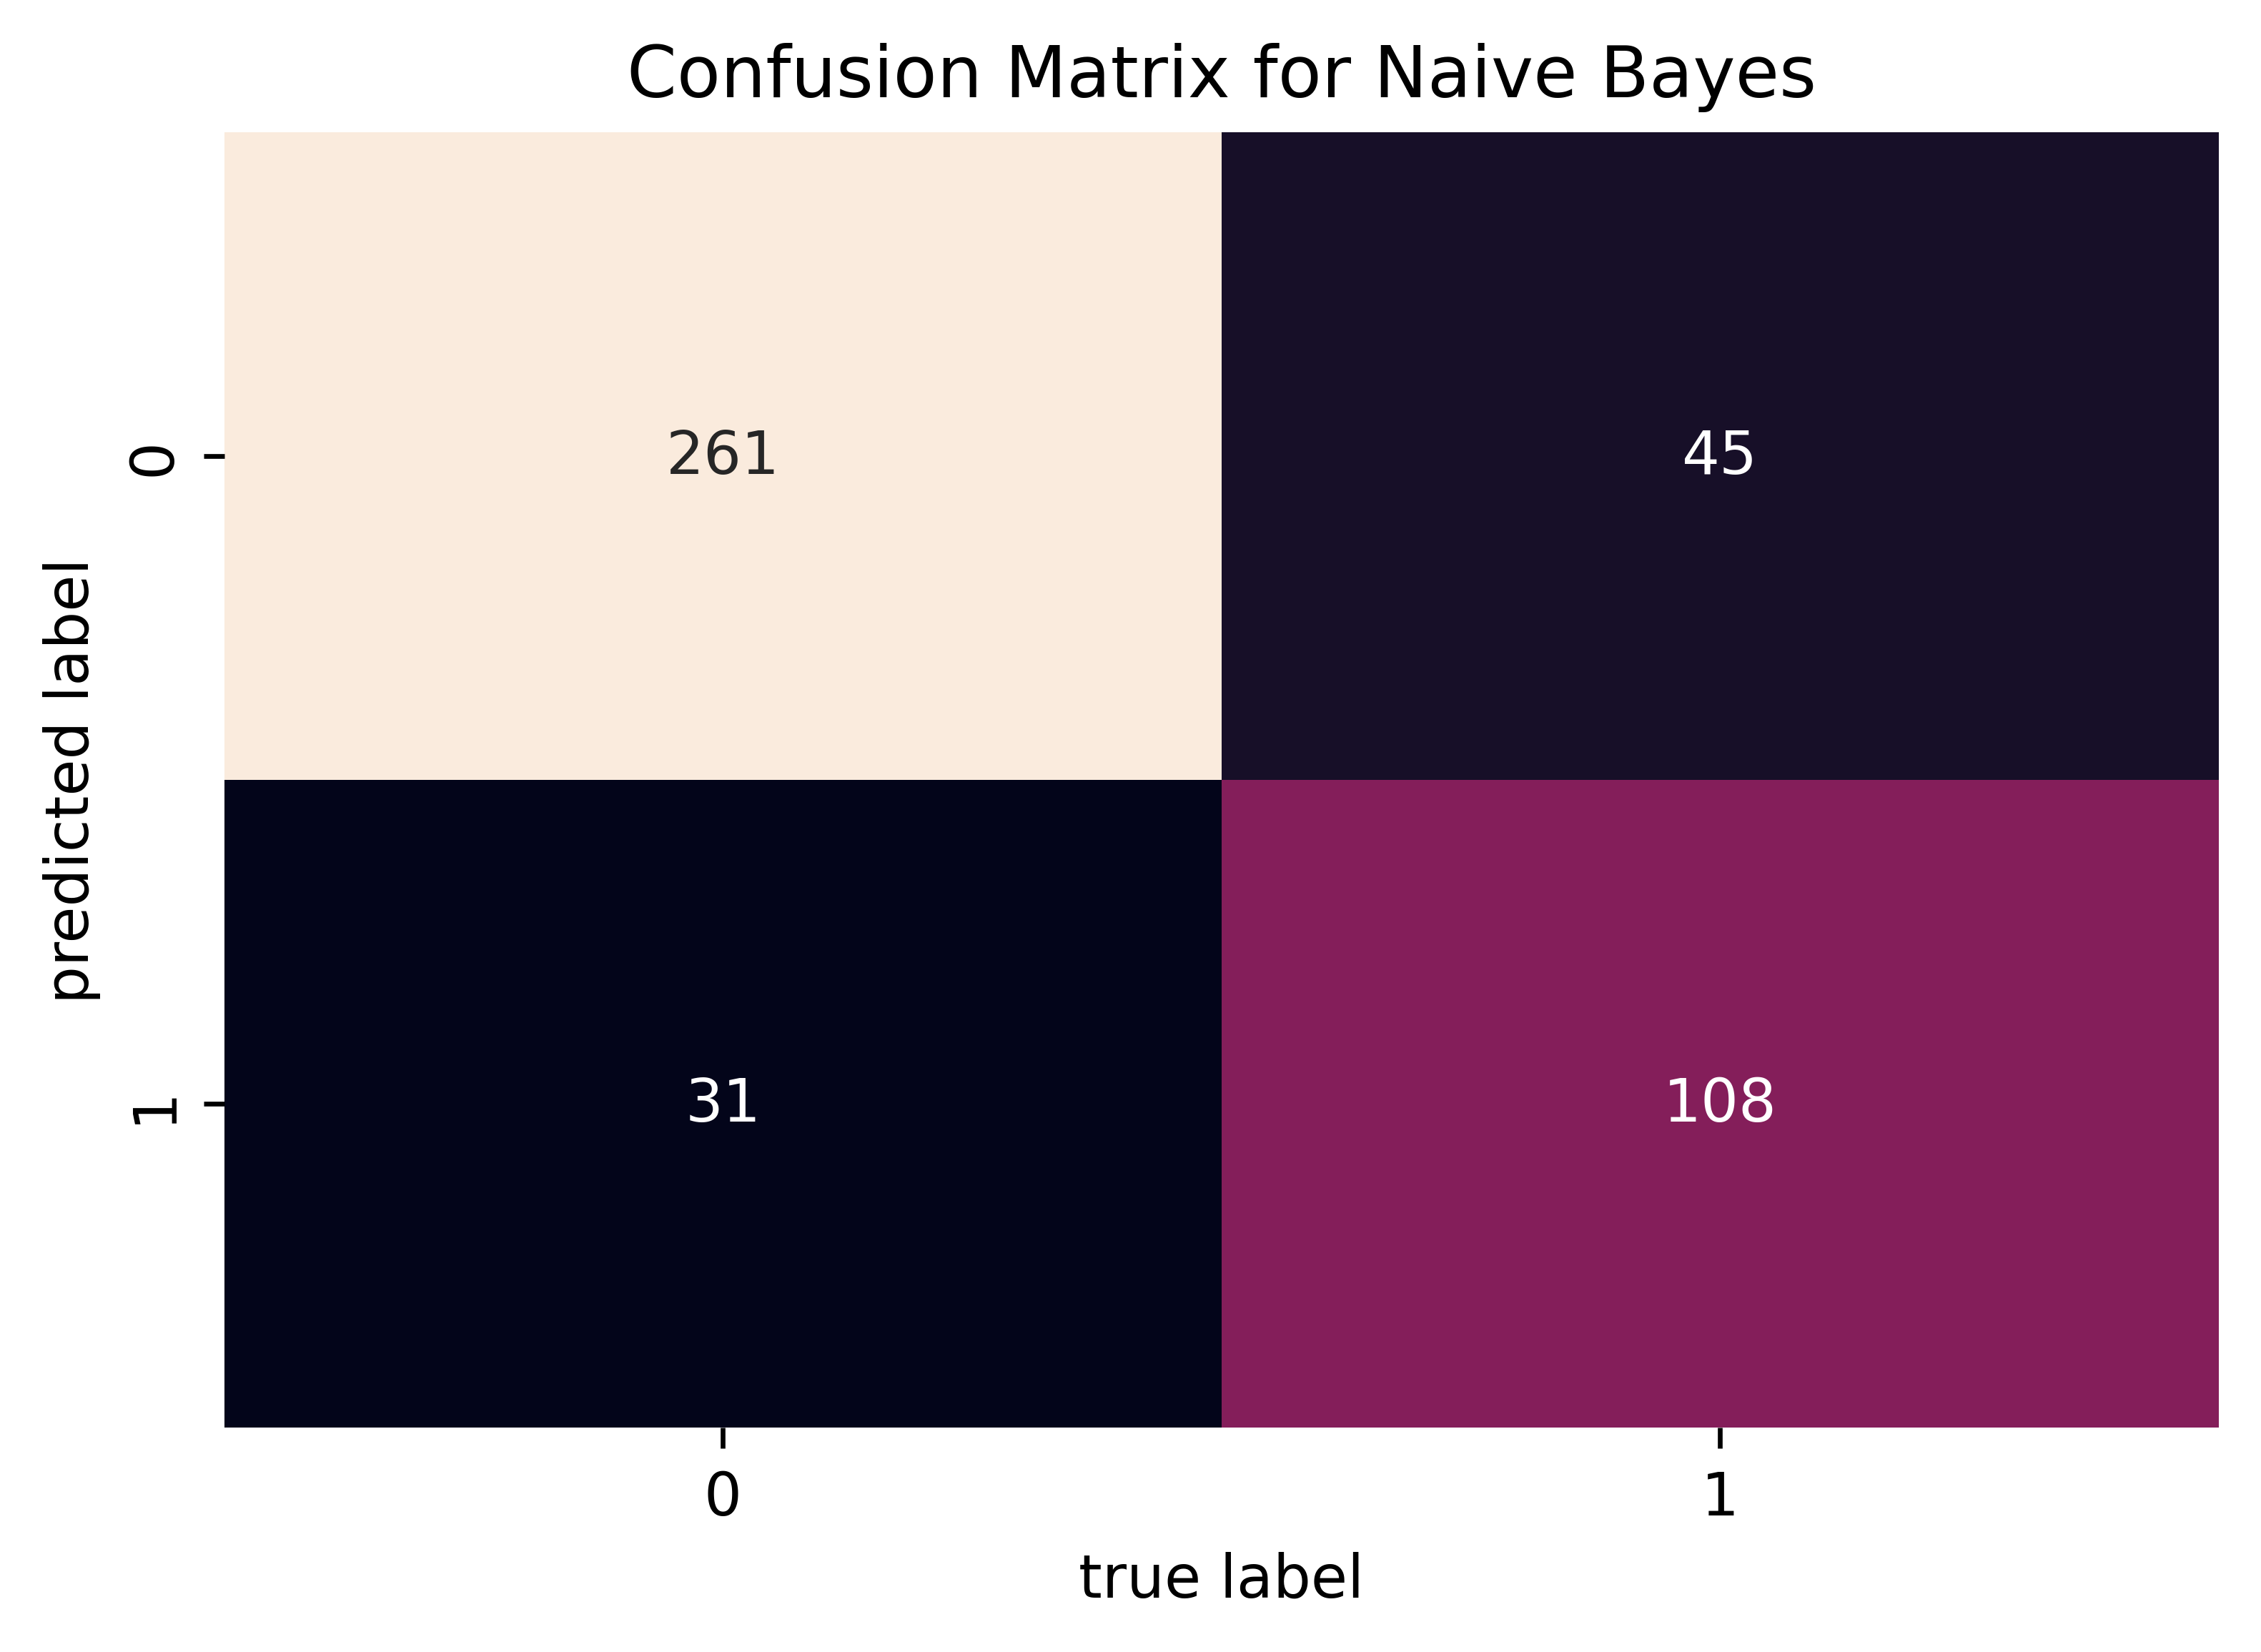

In [15]:
plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [16]:
score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.8292134831460675


In [17]:
print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

    Negativo       0.85      0.89      0.87       292
    Positivo       0.78      0.71      0.74       153

    accuracy                           0.83       445
   macro avg       0.81      0.80      0.81       445
weighted avg       0.83      0.83      0.83       445

